(1, 3, 3, 1)


/home/guest/anaconda3/envs/learning/lib/python3.6/site-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


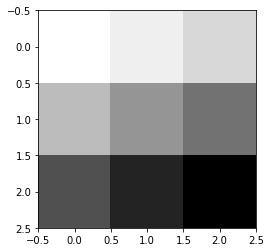

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

sess = tf.InteractiveSession()
image = np.array([[[[1], [2], [3]], 
                   [[4], [5], [6]],
                   [[7], [8], [9]]]], dtype=np.float32)

print(image.shape)
plt.imshow(image.reshape(3,3), cmap="Greys")

(2, 2, 1, 1)
(1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


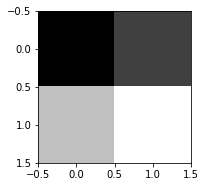

In [12]:
weight = tf.constant([[[[1.]], [[1.]]], 
                     [[[1.]],[[1.]]]])
print(weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
conv2d_image = conv2d.eval()
print(conv2d_image.shape)

conv2d_img = np.swapaxes(conv2d_image, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2, 2))
    plt.subplot(1, 2, i+1), plt.imshow(one_img.reshape(2, 2), cmap='gray')

(2, 2, 1, 1)
(1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


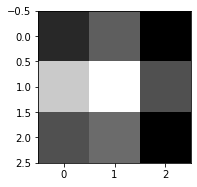

In [11]:
# padding이 SAME인 경우 stride가 1*1일 때 원본이미지와 같은 결과 사이즈가 도출된다.
weight = tf.constant([[[[1.]], [[1.]]], 
                     [[[1.]],[[1.]]]])
print(weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_image = conv2d.eval()
print(conv2d_image.shape)

conv2d_img = np.swapaxes(conv2d_image, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3, 3))
    plt.subplot(1, 2, i+1), plt.imshow(one_img.reshape(3, 3), cmap='gray')

(2, 2, 1, 3)
(1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


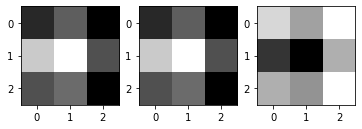

In [14]:
# 3 filters(2, 2, 1, 3)
weight = tf.constant([[[[1., 10., -1]], [[1., 10., -1]]], 
                     [[[1., 10., -1]],[[1., 10., -1]]]])
print(weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_image = conv2d.eval()
print(conv2d_image.shape)

conv2d_img = np.swapaxes(conv2d_image, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3, 3))
    plt.subplot(1, 3, i+1), plt.imshow(one_img.reshape(3, 3), cmap='gray')

In [15]:
# Max Pooling
image = np.array([[[[4], [3]], [[2], [1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


In [16]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


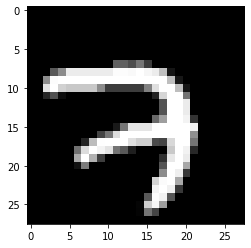

In [17]:
img = mnist.train.images[0].reshape(28, 28)
plt.imshow(img, cmap='gray')

Tensor("Conv2D_8:0", shape=(1, 14, 14, 5), dtype=float32)


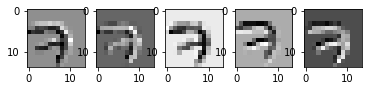

In [18]:
sess = tf.InteractiveSession()

img = img.reshape(-1, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01))
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')
print(conv2d)

sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1, 5, i+1), plt.imshow(one_img.reshape(14, 14), cmap='gray')

Tensor("MaxPool_1:0", shape=(1, 7, 7, 5), dtype=float32)


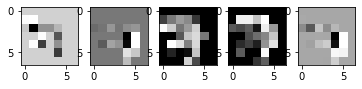

In [19]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1, 5, i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')